# Random forest predictions
This notebook ingests the positive and negative training vectors as well as the prediction set as generated by the notebook ``ExtractDifferenceVectors.ipynb``. It then perfoms Random forest learning and ranks the prediction set.

In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('../..'))
from kcet import KcetParser
import pickle5 as pickle


In [2]:

prediction_pickle_path = "predictions.pkl"
positive_diff_pickle_path =  "positive-vectors.pkl"
negative_diff_pickle_path =  "negative-vectors.pkl"
with open(prediction_pickle_path, "rb") as fpred:
     diff_vectors_prediction = pickle.load(fpred)
with open(positive_diff_pickle_path, "rb") as fpos:        
    diff_vectors_pos = pickle.load(fpos)
with open(negative_diff_pickle_path, "rb") as fneg:    
    diff_vectors_neg = pickle.load(fneg)

In [3]:
diff_vectors_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,0.708197,1.290104,0.561938,-0.099391,1.151502,-0.743111,-1.097506,-1.140788,-0.228039,-0.000998,...,-0.584290,0.115289,0.182056,-1.740004,1.747286,1.337672,-1.003394,-0.067877,0.314209,-0.146105
ncbigene23552-meshd000069293,1.422597,0.577610,0.680395,0.114170,1.359240,-0.015148,-0.157970,-0.657875,0.065483,0.014552,...,-0.376531,0.509528,-0.034168,-1.419383,1.380829,1.882058,-0.301778,-0.201751,0.157687,0.624365
ncbigene23552-meshd000069584,0.679305,-0.004023,0.523511,-0.450354,0.490123,-0.402770,-1.688186,-2.444986,-0.504033,-0.748134,...,0.045433,-0.717899,0.331410,-0.820566,1.714909,0.100310,-0.417283,0.213280,1.174330,0.138305
ncbigene23552-meshd000070779,1.151146,0.914599,0.629768,0.571509,0.826595,-0.892867,-0.926174,-0.515938,0.383801,-0.677248,...,-0.393525,-0.404764,0.297285,-0.904665,1.380163,1.050284,0.172301,-0.037946,0.460384,-0.532447
ncbigene23552-meshd000071380,1.654519,0.218517,1.167848,0.482340,1.093505,0.097858,-1.306451,-0.876615,0.321109,-0.974852,...,-0.926187,0.802710,1.364528,-1.569548,0.882294,1.580470,-1.177857,0.321215,0.507300,0.833965


In [4]:
diff_vectors_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1019-meshd001943,-0.434411,-1.889999,0.374132,-0.120404,0.002760,-0.530017,-0.965589,-1.653457,-0.037492,1.472465,...,0.439234,0.659739,0.176268,-0.035537,0.413029,-0.436895,2.692938,-1.525303,0.981667,0.201775
ncbigene1021-meshd001943,-0.416303,-1.027129,0.444179,-0.417551,-0.427044,-0.774379,-1.043213,-1.962192,0.010902,1.493068,...,0.446101,0.331551,0.122329,0.500271,0.545721,-1.158050,2.694491,-1.975505,1.153500,-0.190905
ncbigene1019-meshd009362,-0.631553,0.153012,0.360211,-0.880816,-0.160928,1.130728,0.075006,0.414997,-0.689192,-0.015581,...,0.460020,0.099272,-0.530670,-0.777735,2.016537,-0.366255,0.544617,-0.815777,1.098674,-2.033392
ncbigene1021-meshd009362,-0.613445,1.015883,0.430258,-1.177963,-0.590733,0.886365,-0.002618,0.106262,-0.640798,0.005022,...,0.466887,-0.228916,-0.584609,-0.241927,2.149229,-1.087410,0.546170,-1.265980,1.270507,-2.426072
ncbigene1956-meshd002289,-0.084595,1.102069,0.024822,-2.339737,2.436727,-0.028744,-2.907514,-0.866866,-0.147452,-0.070917,...,0.137142,1.167701,-0.929502,-1.175559,-1.213201,0.708660,-0.341512,-1.220692,0.654849,0.117270


In [5]:
diff_vectors_neg.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene440275-meshd018218,0.968610,-1.929322,1.101802,1.904827,1.880476,1.753052,-1.974936,1.233133,1.087635,-2.587520,...,-0.892062,2.147117,2.851382,-2.123014,-1.380875,3.016850,-2.567695,0.926388,0.668226,5.370856
ncbigene4831-meshd054973,-0.266537,2.009765,-0.159027,0.814106,-0.530754,-0.902518,0.118194,-1.057204,0.195545,0.801163,...,0.839551,-1.358862,0.940541,0.203573,1.306250,-0.406775,1.801726,0.054448,-0.806447,-1.829630
ncbigene9262-meshd045888,-1.193298,3.261002,-0.872101,0.045588,-1.865568,-2.381489,1.243134,-0.968983,-0.028440,3.082846,...,0.682173,-1.290547,-1.231358,0.351326,1.621699,-2.722793,2.762807,-0.287870,-0.437183,-4.664558
ncbigene2580-meshd008479,-0.798046,2.691194,-0.483652,-0.406328,-0.084581,-0.891401,-0.317361,-0.908283,-0.739262,0.768099,...,0.171384,-0.768527,-0.362190,-0.663477,1.151895,-0.541382,0.951509,-0.471440,-0.345302,-1.424591
ncbigene8851-meshd052958,0.915241,0.993658,-0.193736,0.620978,0.010235,-0.286876,-0.534291,-0.081382,-0.627278,-0.268395,...,-0.581172,0.256752,0.620065,-0.437445,1.181359,0.375706,0.529248,-0.495341,0.026085,-0.314498


# Random Forest
### 1. Training set
Create the training set by concatenating ``diff_vectors_pos`` and ``diff_vectors_neg``.

In [6]:
X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])
print("Total training vectors: %d" % len(X_train))

Total training vectors: 5776


In [7]:
label_1 = np.ones(diff_vectors_pos.shape[0])
label_0 = np.zeros(diff_vectors_neg.shape[0])
y_train = np.concatenate((label_1,label_0))
print("Total training labels: %d" % len(y_train))

Total training labels: 5776


### 2. Test set. 
The test set is the prediction set with one label (either 0 or 1)

In [8]:
X_test = diff_vectors_prediction
label_test = np.ones(diff_vectors_prediction.shape[0])
y_test = label_test

In [9]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,0.708197,1.290104,0.561938,-0.099391,1.151502,-0.743111,-1.097506,-1.140788,-0.228039,-0.000998,...,-0.584290,0.115289,0.182056,-1.740004,1.747286,1.337672,-1.003394,-0.067877,0.314209,-0.146105
ncbigene23552-meshd000069293,1.422597,0.577610,0.680395,0.114170,1.359240,-0.015148,-0.157970,-0.657875,0.065483,0.014552,...,-0.376531,0.509528,-0.034168,-1.419383,1.380829,1.882058,-0.301778,-0.201751,0.157687,0.624365
ncbigene23552-meshd000069584,0.679305,-0.004023,0.523511,-0.450354,0.490123,-0.402770,-1.688186,-2.444986,-0.504033,-0.748134,...,0.045433,-0.717899,0.331410,-0.820566,1.714909,0.100310,-0.417283,0.213280,1.174330,0.138305
ncbigene23552-meshd000070779,1.151146,0.914599,0.629768,0.571509,0.826595,-0.892867,-0.926174,-0.515938,0.383801,-0.677248,...,-0.393525,-0.404764,0.297285,-0.904665,1.380163,1.050284,0.172301,-0.037946,0.460384,-0.532447
ncbigene23552-meshd000071380,1.654519,0.218517,1.167848,0.482340,1.093505,0.097858,-1.306451,-0.876615,0.321109,-0.974852,...,-0.926187,0.802710,1.364528,-1.569548,0.882294,1.580470,-1.177857,0.321215,0.507300,0.833965


## Hyperparameter tuning the random forest.

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Search over the parameters to choose the best model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 10, random_state=42)

rf_random.fit(X_train,y_train)

best_model = rf_random.best_estimator_

In [12]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

# Prediction

In [13]:
y_pred = best_model.predict(X_test)
yproba = best_model.predict_proba(X_test)[::,1]

## Decoding results
The ``KcetParser`` class has methods that take the raw X_test vectors and create an annotated dataframe by
decoding strings like ``ncbigene5599-meshd000074723`` to show the corresponding gene symbols and MeSH labels (neoplasms),
and also placing the probabilities of the predictions in the corresponding rows. The resulting dataframe
is sorted according to probability. The ``deleteEmbeddings`` argument determines whether we only return the
three columns ``gene_symbol1``, ``cancer``, and ``probability``.

In [14]:
from kcet import KcetParser
kcetParser = KcetParser()
predictions = kcetParser.decode_predictions(vectors=X_test, probabilities=yproba, deleteEmbeddings=True)
predictions.head(n=20)

[INFO] Reading protein kinase information from /Users/ravanv/PycharmProjects/KCET/input/prot_kinase.tsv
[INFO] ingested symbol_to_id_map with 522 entries such as {'NCBIGene:2870': 'GRK6'}
[INFO] Ingested mesh_id list with 698 entries such as 'meshd000008' and 'meshd000069293', 
[INFO] Ingested _meshid2disease_map with 698 entries
[INFO] Ingested meshid2disease_map with 514 entries
[INFO] Ingested pki_to_kinase with 76 entries


,gene_symbol,cancer,probability
ncbigene2260-meshd009362,FGFR1,Neoplasm Metastasis,0.920000
ncbigene558-meshd007938,AXL,Leukemia,0.905000
ncbigene2261-meshd009362,FGFR3,Neoplasm Metastasis,0.900000
ncbigene4920-meshd007938,ROR2,Leukemia,0.900000
ncbigene5754-meshd007938,PTK7,Leukemia,0.900000
ncbigene613-meshd008175,BCR,Lung Neoplasms,0.895000
ncbigene2065-meshd006528,ERBB3,"Carcinoma, Hepatocellular",0.890000
ncbigene3643-meshd002277,INSR,Carcinoma,0.885084
ncbigene3480-meshd006528,IGF1R,"Carcinoma, Hepatocellular",0.880075
ncbigene1969-meshd007938,EPHA2,Leukemia,0.880000


In [15]:
print("Total number of predictions:", len(predictions))

Total number of predictions: 330922


In [16]:
predictions.to_csv("predictions_novel.tsv",index=False,sep="\t")

## Distributions of positive training set
Here, we plot the distributions of the probabiliies of the positive and negative training samples as calculated by the random forest.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [18]:
y_pred_train = best_model.predict(X_train)
yproba_train = best_model.predict_proba(X_train)[::,1]

In [19]:
yproba_train

array([1.        , 0.99503569, 1.        , ..., 0.00226969, 0.00121041,
       0.00131961])

In [20]:
y_pred_train

array([1., 1., 1., ..., 0., 0., 0.])

In [21]:
num_pos_train= len(diff_vectors_pos)
num_neg_train = len(diff_vectors_neg)

In [22]:
pos_train_probs = []
neg_train_probs = []
for i in range(len(yproba_train)):
    if i < num_pos_train:
        pos_train_probs.append(yproba_train[i])
    else:
        neg_train_probs.append(yproba_train[i])
# sanity check
print("[INFO] Got %d positive and %d negative predictions" % (len(pos_train_probs), len(neg_train_probs)))

[INFO] Got 559 positive and 5217 negative predictions


In [23]:
posnp = np.array(pos_train_probs)
pos_train = pd.Series(posnp, name="Prediction score of positive training")
negnp = np.array(neg_train_probs)
neg_train = pd.Series(negnp, name="Prediction score of positive training")


## Probabiity distribution of prediction scores:

In [24]:
n_predictions = len(predictions)
print("[INFO] Got %d  predictions" % n_predictions)
probility = []
for i in range(n_predictions):
    row = predictions.iloc[i]
    pr = float(row['probability'])
    probility.append(pr)

[INFO] Got 330922  predictions


In [25]:
prediction_scores = np.array(probility)
import pandas as pd
prediction = pd.Series(prediction_scores, name="Prediction score")


/Users/ravanv/PycharmProjects/KCET/kcet_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


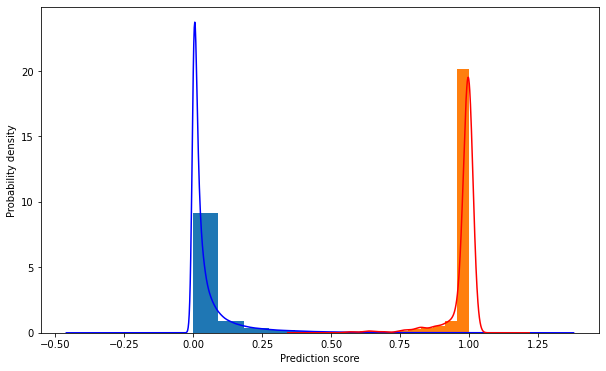

In [41]:

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)


prediction.plot.kde(ax=ax1, legend=False,color="blue")
prediction.plot.hist(density = True, ax=ax1)
pos_train.plot.kde(ax=ax1, legend=False,color ="red")
pos_train.plot.hist( density = True, ax=ax1)

ax1.set_xlabel("Prediction score")
ax1.set_ylabel('Probability density')


fig.show()

/Users/ravanv/PycharmProjects/KCET/kcet_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


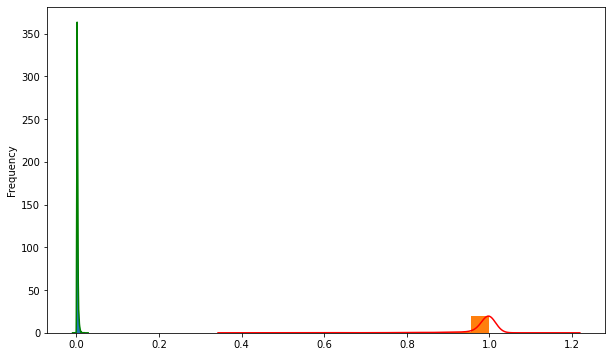

In [46]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
#prediction.plot.kde(ax=ax2, legend=False,color="blue")
#prediction.plot.hist(density = True, ax=ax1)
neg_train.plot.kde(ax=ax, legend=False,color ="green")
neg_train.plot.hist(density=True, ax=ax)

pos_train.plot.kde(ax=ax, legend=False,color ="red")
pos_train.plot.hist( density = True, ax=ax)

ax2.set_xlabel("Prediction score")
ax2.set_ylabel('Probability density')

fig.show()

In [35]:
print("Minimum prob, positive group:", np.min(posnp))
print("Maximum prob, positive group:", np.max(posnp))
print("prob at 1st percentile, positive group:", np.percentile(posnp, 1))
print("prob at 5th percentile, positive group:", np.percentile(posnp, 5))
print("prob at 10th percentile, positive group:", np.percentile(posnp, 10))
print("prob at 20th percentile, positive group:", np.percentile(posnp, 20))
print("prob at 90th percentile, positive group:", np.percentile(posnp, 90))

print()
print("Minimum prob, negative group:", np.min(negnp))
print("Maximum prob, negative group:", np.max(negnp))
print("prob at 99th percentile, negative group:", np.percentile(negnp, 99))
print("prob at 95th percentile, negative group:", np.percentile(negnp, 95))
print("prob at 90th percentile, negative group:", np.percentile(negnp, 90))
print("prob at 80th percentile, negative group:", np.percentile(negnp, 80))
print()
print("Minimum prob, prediction group:", np.min(prediction_scores))
print("Maximum prob, prediction group:", np.max(prediction_scores))
print("prob at 99th percentile, prediction group:", np.percentile(prediction_scores, 99))
print("prob at 95th percentile, prediction group:", np.percentile(prediction_scores, 95))
print("prob at 90th percentile, prediction group:", np.percentile(prediction_scores, 90))
print("prob at 80th percentile, prediction group:", np.percentile(prediction_scores, 80))

Minimum prob, positive group: 0.5619012759941744
Maximum prob, positive group: 1.0
prob at 1st percentile, positive group: 0.6694794752828351
prob at 5th percentile, positive group: 0.8649267636751942
prob at 10th percentile, positive group: 0.9393802107637975
prob at 20th percentile, positive group: 0.985283818400631
prob at 90th percentile, positive group: 1.0

Minimum prob, negative group: 0.0
Maximum prob, negative group: 0.018874325869076426
prob at 99th percentile, negative group: 0.008252284057640804
prob at 95th percentile, negative group: 0.005532719345375137
prob at 90th percentile, negative group: 0.004224678554393268
prob at 80th percentile, negative group: 0.0032057839297660014

Minimum prob, prediction group: 0.0
Maximum prob, prediction group: 0.92
prob at 99th percentile, prediction group: 0.4850394850189785
prob at 95th percentile, prediction group: 0.24161594768317368
prob at 90th percentile, prediction group: 0.14275686285644223
prob at 80th percentile, prediction gr